# EDA on Summer Olympics

------------

## Table of Contents
1. Problem Statement
2. Importing Packages
3. Loading Data
4. Pandas Profiling before Data Preprocessing
5. Exploratory Data Analysis
    - 5.1. Which country got the highest Medal count?
    - 5.2. Which country got the highest Gold Medal?
    - 5.3. proportion of Medal counts
    - 5.4. proportion of medal counts per city
    - 5.5. Creating new DataFrame with City names, Gold, silver and bronze medal counts
    - 5.6. City Vs Medal
    - 5.7. Which city won highest Medals in Olympics?
    - 5.8. Gold Medal count of wining City ?
    - 5.9. proportion of Medal counts won by Men & Women Participants
    - 5.10. Total number of Medal won by Men and women Participants?
    - 5.11. Total number of Medal won by Men Participants per year basis?
    - 5.12. Total number of Medal won by  women Participants per year basis?
    - 5.13. City vs Gender
    - 5.14. Medal counts won by Men & Women Participants of each City
    - 5.15. How many Medals won in Olympics per year basis?
    - 5.16. Number of Medals won per year
    - 5.17. Which year has the highest Medal count?
    - 5.18. proportion of Sports
    - 5.19. Which sport got the highest Medal and which got highest Gold medal?
    - 5.20. Which sport got highest Gold medal?
    - 5.21. How many Athletes participated in Olympics from 1896 to 1992?
    - 5.22. Boxplot showing participants’ interest for Sports


6. Conclusion

### 1. Problem Statement

Olympics are leading international sporting events in which thousands of athletes from around the world participate in a variety of competions.

The data set is collected from year 1896 to 1992 which contains the Atheletes,Sports and locations details of winning Medal in the olympics.


### 2. Importing Packages

In [4]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)

### 3. Loading Data
This data set contains Summer Olympics information from year 1896-1992

In [5]:
SummerOlympics=pd.read_excel(r"C:\Users\lomandal\Downloads\Python Exercise\insaid\Project\Summer Olympics\summer_olympics.xlsx")


info function gives us the following insights into the SummerOlympics dataframe:

- There are a total of 20194 samples (rows) and 9 columns in the dataframe.
- There are 1 column with a numeric datatype and 8 columns with an object datatype.


In [6]:
SummerOlympics.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [6]:
SummerOlympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20293 entries, 0 to 20292
Data columns (total 9 columns):
Year          20293 non-null int64
City          20293 non-null object
Sport         20293 non-null object
Discipline    20293 non-null object
Athlete       20293 non-null object
Country       20293 non-null object
Gender        20293 non-null object
Event         20293 non-null object
Medal         20293 non-null object
dtypes: int64(1), object(8)
memory usage: 1.4+ MB


In [8]:
SummerOlympics.describe()

,Year
count,20293.000000
mean,1953.081752
std,28.262098
min,1896.000000
25%,1928.000000
50%,1960.000000
75%,1980.000000
max,1992.000000


### 4. Pandas Profiling before Data Preprocessing

In [9]:
profile = pandas_profiling.ProfileReport(SummerOlympics)
profile.to_file(output_file="profiling_before_preprocessing.html")

#### Observations from Pandas Profiling before Data Processing

Dataset info :-
Number of variables : 9  
Number of observations : 20293 

Variables types :-
Numeric : 1 
Categorical : 8 

No Missing cells


### 5. Exploratory Data Analysis

#### 5.1. Which country got the highest Medal count?

In [11]:
SummerOlympics. groupby(['Country'])['Medal'].count().sort_values(ascending=False).head(1)

Country
USA    3162
Name: Medal, dtype: int64

#### 5.2. Which country got the highest Gold Medal?

In [12]:
SummerOlympics_Gold=SummerOlympics[SummerOlympics.Medal=="Gold"]
SummerOlympics_Gold.groupby(['Country'])['Medal'].count().sort_values(ascending=False).head(1)

Country
USA    1545
Name: Medal, dtype: int64

#### 5.3. proportion of Medal counts

Text(0, 0.5, 'Medal')

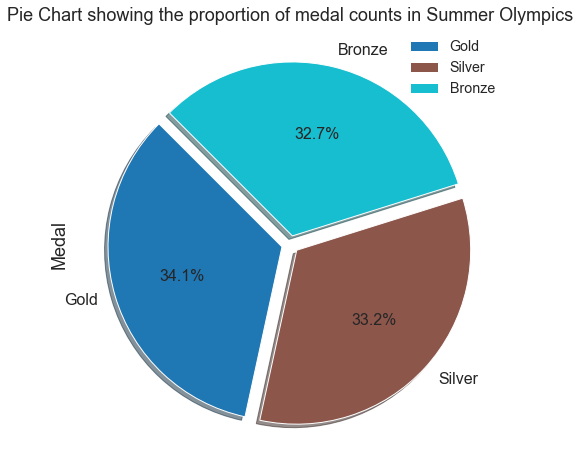

In [13]:
SummerOlympics.Medal.value_counts().plot(kind='pie', explode=[0.05,0.05,0.05], fontsize=16, autopct='%3.1f%%', 
                                               figsize=(8,8), shadow=True, startangle=135, legend=True, cmap='tab10')
plt.title('Pie Chart showing the proportion of medal counts in Summer Olympics', fontsize=18)
plt.ylabel('Medal', fontsize=18)

#### 5.4. proportion of medal counts per city

Text(0.5, 1.0, 'Donut Plot showing the proportion of medal counts per city')

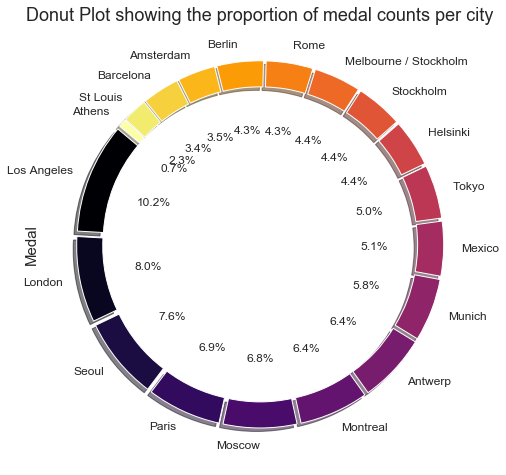

In [14]:
space = np.ones(19)/18
SummerOlympics['City'].value_counts().plot(kind='pie', explode=space, fontsize=12, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=500, figsize=(8,8), cmap='inferno')

plt.ylabel('Medal', fontsize=15)
plt.title('Donut Plot showing the proportion of medal counts per city', fontsize=18)

#### 5.5. Creating new DataFrame with City names, Gold, silver and bronze medal counts

In [15]:
SMG=SummerOlympics[SummerOlympics.Medal=="Gold"]
SMG1=pd.DataFrame(SMG.groupby('City').Medal.count())
SMG1.columns=["Gold"]

SMS=SummerOlympics[SummerOlympics.Medal=="Silver"]
SMS1=pd.DataFrame(SMS.groupby('City').Medal.count())
SMS1.columns=["Silver"]

SMB=SummerOlympics[SummerOlympics.Medal=="Bronze"]
SMB1=pd.DataFrame(SMB.groupby('City').Medal.count())
SMB1.columns=["Bronze"]

SM=pd.merge(SMG1, SMS1, on='City')
SM1=pd.merge(SM, SMB1, on='City')

In [16]:
SM1['City']=SM1.index
SM1.head()

,Gold,Silver,Bronze,City
City,,,,
Amsterdam,229,239,242,Amsterdam
Antwerp,497,446,355,Antwerp
Athens,64,47,40,Athens
Barcelona,232,221,243,Barcelona
Berlin,299,294,282,Berlin


#### 5.6. City Vs Medal

Text(0.5, 1.0, 'City Vs Medal')

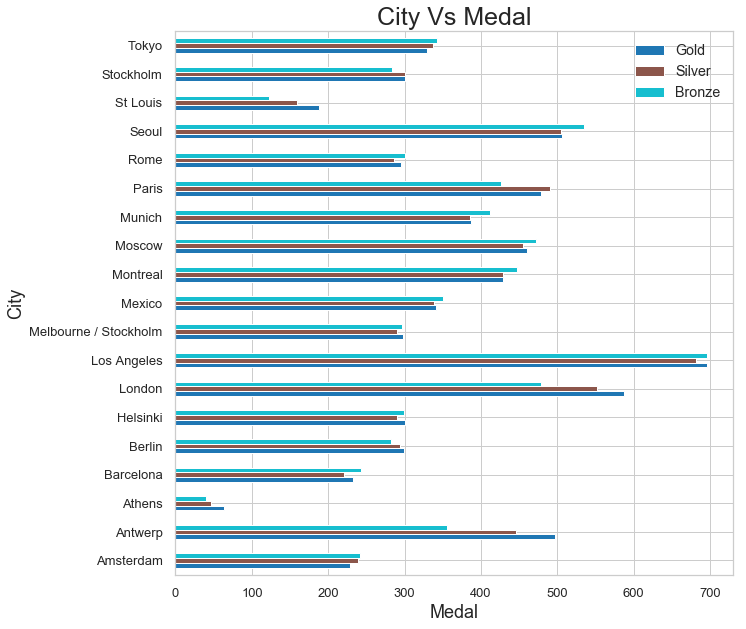

In [17]:
SM1[["Gold","Silver","Bronze","City"]].plot(kind='barh', title="City VS Medal", fontsize=13,
                                                            cmap='tab10', figsize=(10, 10))

plt.xlabel('Medal', fontsize=18)
plt.ylabel('City', fontsize=18)
plt.title('City Vs Medal',fontsize=25)

#### 5.7. Which city won highest Medals in Olympics?

In [18]:
SummerOlympics. groupby(['City'])['Medal'].count().sort_values(ascending=False).head(1)

City
Los Angeles    2074
Name: Medal, dtype: int64

#### 5.8. Gold Medal count of wining City 'Los Angeles'

In [19]:
Wining_city=SummerOlympics[SummerOlympics.City== 'Los Angeles']
Wining_city[Wining_city.Medal=='Gold'].Medal.count()

696

#### 5.9. proportion of Medal counts won by Men & Women Participants

Text(0, 0.5, 'Gender')

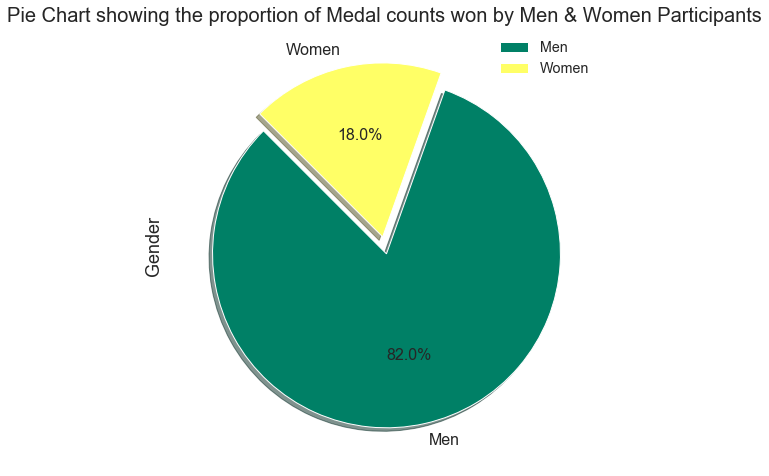

In [20]:
SummerOlympics.Gender.value_counts().plot(kind='pie', explode=[0.05,0.05], fontsize=16, autopct='%3.1f%%', 
                                               figsize=(8,8), shadow=True, startangle=135, legend=True, cmap='summer')
plt.title('Pie Chart showing the proportion of Medal counts won by Men & Women Participants', fontsize=20)
plt.ylabel('Gender', fontsize=18)

#### 5.10. Total number of Medal won by Men and women Participants?

In [21]:
SummerOlympics. groupby(['Gender'])['Medal'].count()

Gender
Men      16650
Women     3643
Name: Medal, dtype: int64

#### 5.11. Total number of Medal won by Men Participants per year basis?

In [22]:
SummerOlympics[SummerOlympics.Gender=="Men"].groupby(['Year'])['Medal'].count()

Year
1896     151
1900     501
1904     458
1908     789
1912     855
1920    1255
1924     833
1928     615
1932     555
1936     791
1948     718
1952     750
1956     739
1960     737
1964     820
1968     819
1972     947
1976     924
1980     958
1984     973
1988    1011
1992     451
Name: Medal, dtype: int64

#### 5.12. Total number of Medal won by  women Participants per year basis?

In [23]:
SummerOlympics[SummerOlympics.Gender=="Women"].groupby(['Year'])['Medal'].count()

Year
1900     11
1904     12
1908     15
1912     30
1920     43
1924     51
1928     95
1932     60
1936     84
1948     96
1952    139
1956    146
1960    145
1964    190
1968    212
1972    238
1976    381
1980    429
1984    486
1988    535
1992    245
Name: Medal, dtype: int64

#### 5.13 City vs Gender

In [24]:
CG=SummerOlympics[['City','Gender','Medal']]
CGM=CG[CG.Gender=="Men"]
CGF=CG[CG.Gender=="Women"]

#### 5.14 Medal counts won by Men & Women Participants of each City

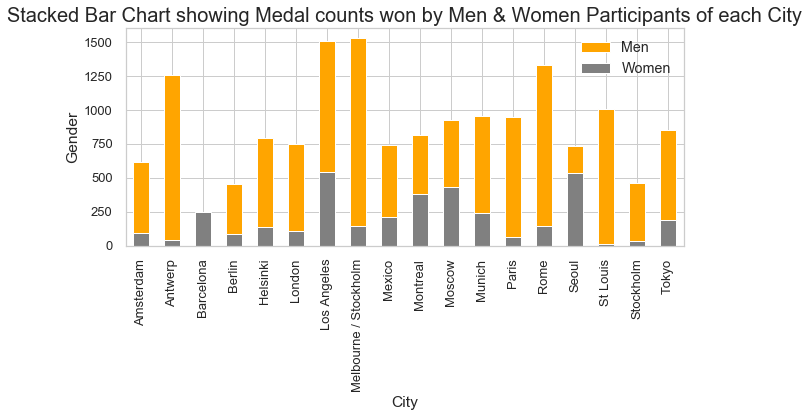

In [25]:
CGM.groupby(['City']).Medal.count().plot(kind='bar', figsize=(10, 4), color='orange')
CGF.groupby(['City']).Medal.count().plot(kind='bar', figsize=(10, 4), color='grey', fontsize=13)

plt.xlabel('City')
plt.ylabel('Gender')
plt.title('Stacked Bar Chart showing Medal counts won by Men & Women Participants of each City', fontsize=20)
plt.legend(labels=('Men', 'Women'))

#### 5.15. How many Medals won in Olympics per year basis?

In [26]:
SummerOlympics. groupby(['Year'])['Medal'].count()

Year
1896     151
1900     512
1904     470
1908     804
1912     885
1920    1298
1924     884
1928     710
1932     615
1936     875
1948     814
1952     889
1956     885
1960     882
1964    1010
1968    1031
1972    1185
1976    1305
1980    1387
1984    1459
1988    1546
1992     696
Name: Medal, dtype: int64

#### 5.16. Number of Medals won per year

Text(0.5, 1.0, 'Bar Chart showing Number of Medals won per year')

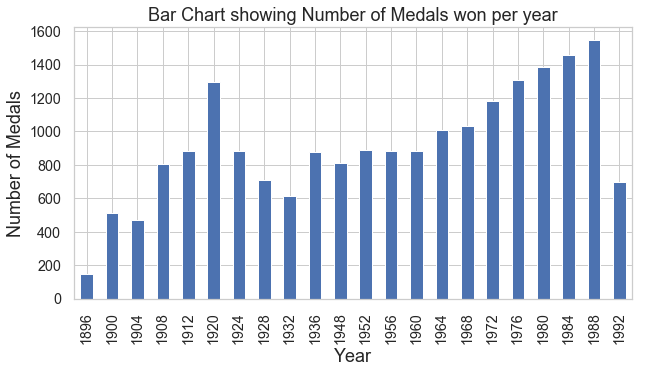

In [27]:
SummerOlympics.groupby(['Year']).Medal.count().plot(kind="bar", figsize=(10, 5))
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of Medals', fontsize=18)
plt.title('Bar Chart showing Number of Medals won per year', fontsize=18)

#### 5.17. Which year has the highest Medal count?

In [28]:
SummerOlympics. groupby(['Year'])['Medal'].count().sort_values(ascending=False).head(1)

Year
1988    1546
Name: Medal, dtype: int64

#### 5.18. proportion of Sports

Text(0.5, 1.0, 'Pie chart showing the proportion of Sports')

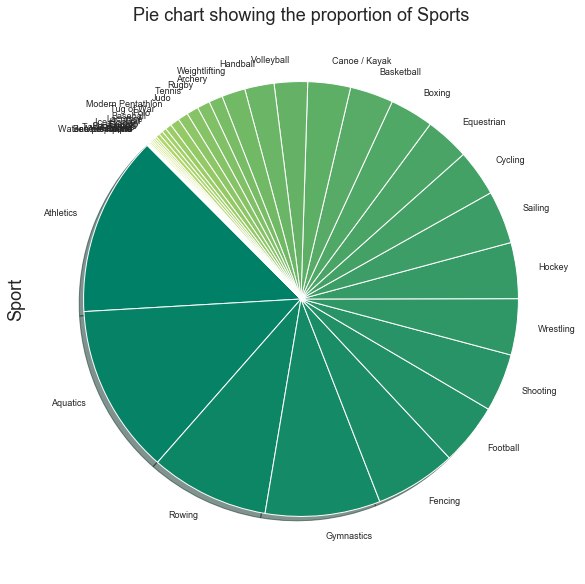

In [29]:
SummerOlympics.Sport.value_counts().plot(kind='pie', fontsize=9,
                                               figsize=(10,10), shadow=True, startangle=135, legend=False, cmap='summer')

plt.ylabel('Sport',fontsize=18)
plt.title('Pie chart showing the proportion of Sports',fontsize=18)

#### 5.19. Which sport got the highest Medal and which got highest Gold medal?

In [30]:
SummerOlympics. groupby(['Sport'])['Medal'].count().sort_values(ascending=False).head(1)

Sport
Athletics    2724
Name: Medal, dtype: int64

#### 5.20. Which sport got highest Gold medal?

In [31]:
SummerOlympics[SummerOlympics.Medal=="Gold"].groupby(['Sport'])['Medal'].count().sort_values(ascending=False).head(1)

Sport
Athletics    914
Name: Medal, dtype: int64

#### 5.21. How many Athletes participated in Olympics from 1896 to 1992?

In [32]:
SummerOlympics.Athlete.value_counts().count()


15161

#### 5.22. Boxplot showing participants’ interest for Sports

Text(0.5, 1.0, 'Sports Vs Year')

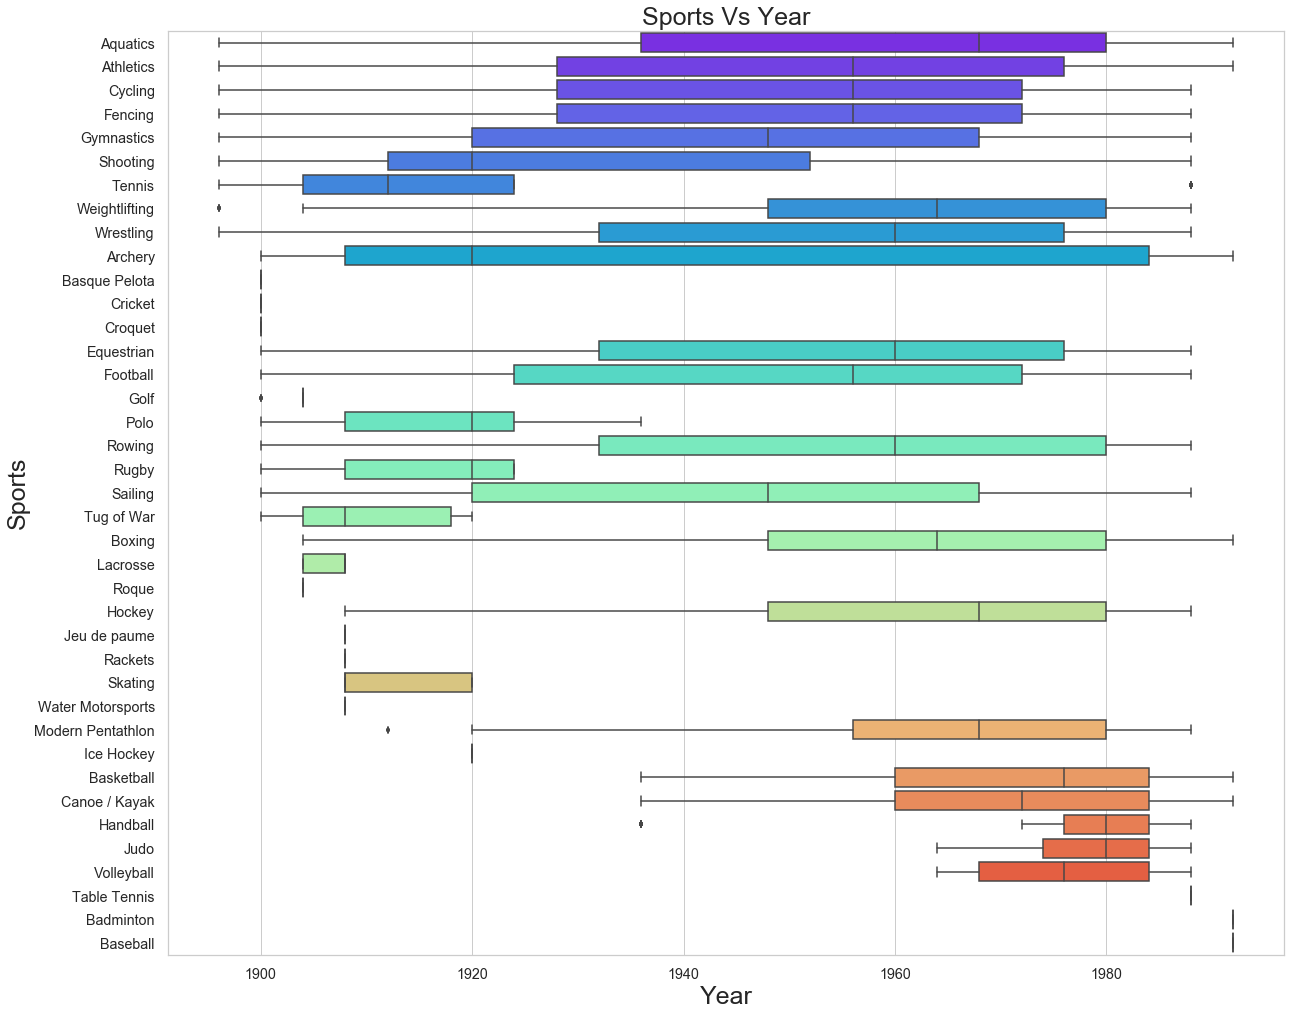

In [33]:
plt.figure(figsize=(20,17))
sns.boxplot(data=SummerOlympics, x='Year', y='Sport', palette='rainbow')

plt.xlabel('Year',fontsize=25)
plt.ylabel('Sports',fontsize=25)
plt.title('Sports Vs Year',fontsize=25)

### 6. Conclusion

1. This analysed data helps us to know the different types of sports played in the Summer Olympics.
From 104 different countries people participated in 39 different sports.
2. 'USA' was the leading Country with 3162 Medals from which 1545 was Gold medals, 
This is the country who won highest Gold Medals as compared to the other countries during the period 1896-1992.
3. Among Cities 'Los Angeles' Played the lead role with 1545 Medals from which 696 was Gold medals.
4. Athletics was the favourite sport.
5. Over all Men and Women contribution for winning Medals has a great difference. Where 82% of medals won by Male participants
only 18% medals won by Female participants. 
But 'Barcelona' was the only City where all the Medals won by only Female participants.
